*install prerequisites from github*

In [28]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-8oe5r7zk
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-8oe5r7zk
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 6ae390f2912c6d0521a1d5860f8f2aeb4089ccee
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done



*Import libraries*

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

*initialize pipeline*

In [30]:
pipeline = ChronosPipeline.from_pretrained("amazon/chronos-t5-tiny",
                                            device_map = "auto",
                                            torch_dtype = torch.bfloat16)

*import data and split into train and test*

In [31]:
series = pd.read_csv("/content/femalebirthCali.csv")

In [32]:
series

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [60]:
train = series.head(320)
test = series.tail(45)

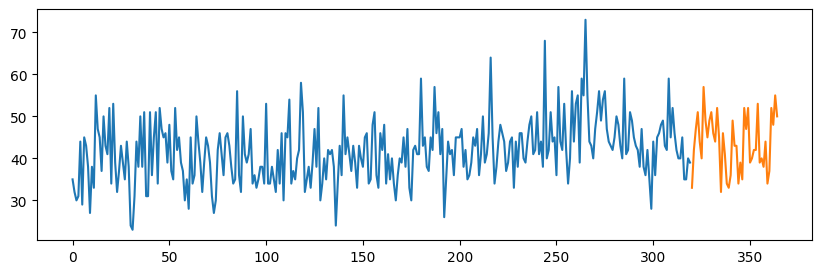

In [61]:
plt.subplots(figsize=(10,3))
plt.plot(train.Births)
plt.plot(test.Births)

In [62]:
to_predict = torch.tensor(train['Births'])
horizon = 45

*forecasst using Chronos pipeline's predict method*

In [63]:
forecast = pipeline.predict(to_predict, horizon)

In [64]:
forecast

tensor([[[33.3608, 46.2154, 46.2154, 37.3396, 35.1971, 38.2578, 30.3002,
          40.4002, 30.3002, 38.2578, 42.2366, 30.3002, 38.2578, 39.1760,
          35.1971, 40.4002, 34.2790, 40.4002, 41.3184, 46.2154, 47.7457,
          36.4214, 35.1971, 33.3608, 37.3396, 39.1760, 44.3790, 45.2972,
          30.3002, 43.7669, 38.5638, 44.3790, 49.2760, 52.3366, 38.2578,
          41.3184, 45.2972, 52.3366, 47.4396, 49.2760, 44.3790, 47.4396,
          39.7881, 46.2154, 50.8063],
         [39.1760, 44.3790, 60.2942, 50.1942, 40.4002, 41.3184, 46.2154,
          55.3972, 44.3790, 46.2154, 37.3396, 43.1548, 39.1760, 46.2154,
          41.3184, 43.1548, 36.4214, 42.2366, 36.4214, 43.1548, 42.2366,
          38.2578, 38.2578, 42.2366, 49.2760, 42.2366, 47.4396, 40.7063,
          41.3184, 30.9123, 41.3184, 45.2972, 39.1760, 40.4002, 43.1548,
          38.2578, 32.4426, 38.2578, 51.4184, 37.3396, 38.2578, 47.7457,
          42.2366, 43.1548, 41.3184],
         [44.3790, 37.3396, 41.3184, 37.3396, 48

In [65]:
forecast.shape

torch.Size([1, 20, 45])

In [66]:
forecast[0].numpy()

array([[33.360775, 46.215385, 46.215385, 37.339584, 35.197147, 38.257767,
        30.300152, 40.400204, 30.300152, 38.257767, 42.236576, 30.300152,
        38.257767, 39.175953, 35.197147, 40.400204, 34.278957, 40.400204,
        41.31839 , 46.215385, 47.745693, 36.421394, 35.197147, 33.360775,
        37.339584, 39.175953, 44.379013, 45.2972  , 30.300152, 43.766884,
        38.56383 , 44.379013, 49.27601 , 52.336624, 38.257767, 41.31839 ,
        45.2972  , 52.336624, 47.439632, 49.27601 , 44.379013, 47.439632,
        39.78808 , 46.215385, 50.806316],
       [39.175953, 44.379013, 60.294243, 50.19419 , 40.400204, 41.31839 ,
        46.215385, 55.397247, 44.379013, 46.215385, 37.339584, 43.15476 ,
        39.175953, 46.215385, 41.31839 , 43.15476 , 36.421394, 42.236576,
        36.421394, 43.15476 , 42.236576, 38.257767, 38.257767, 42.236576,
        49.27601 , 42.236576, 47.439632, 40.706264, 41.31839 , 30.912277,
        41.31839 , 45.2972  , 39.175953, 40.400204, 43.15476 , 38.2577

*Extract median , upper and lower bouds(10 &90th percentile) of forecast and plot*

In [68]:
up, median, low = np.quantile(forecast[0].numpy(),[0.1,0.5,0.9], axis = 0)

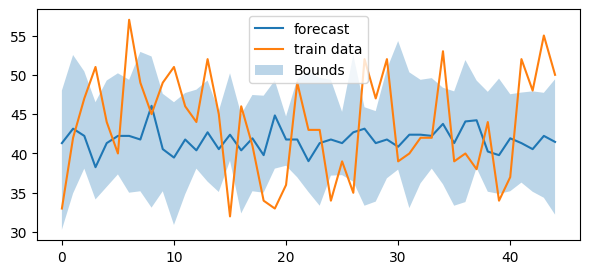

In [77]:
plt.subplots(figsize=(7,3))
plt.plot(median, label = 'forecast')
plt.plot(list(test['Births']), label = 'train data')
plt.fill_between(range(0,45), low, up, alpha=0.3, label="Bounds")
plt.legend()

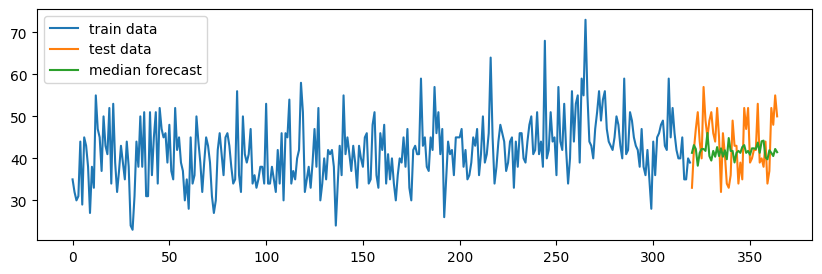

In [75]:
plt.subplots(figsize=(10,3))
plt.plot(train.Births, label = 'train data')
plt.plot(test.Births, label = 'test data')
plt.plot(np.arange(320,365),median, label = 'median forecast')
plt.legend()